# **Date: 21/02/2026 - Building a HIPAA Aware LLM System**

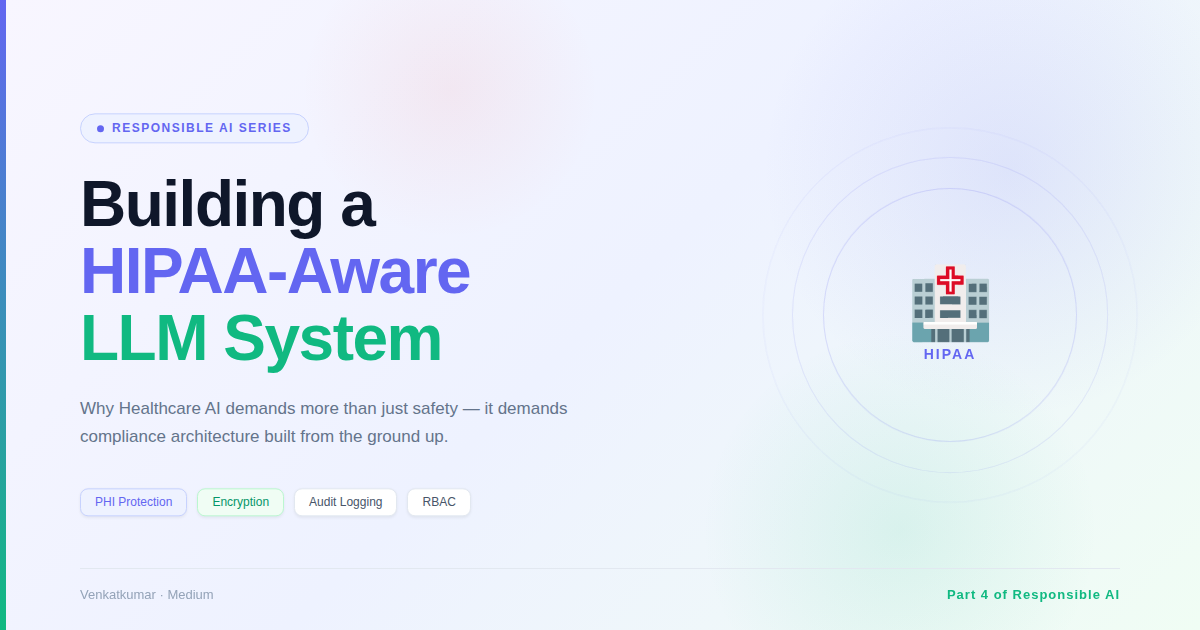

# **HIPAA : Simple explaination**

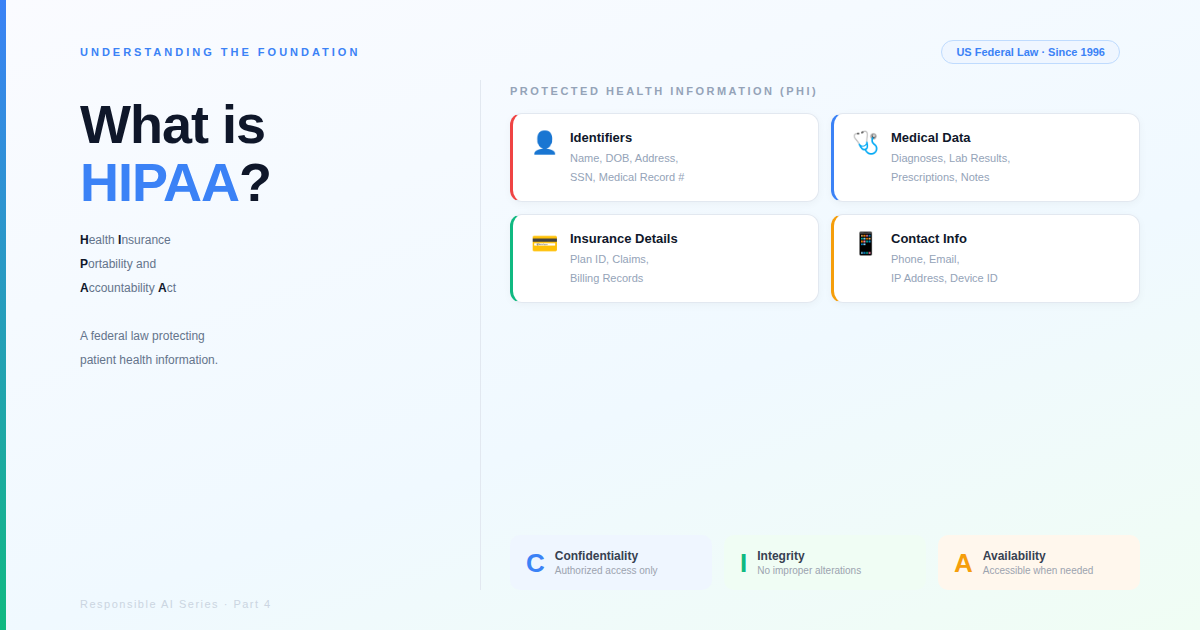

# **Install necessary library**

In [2]:
!pip install transformers cryptography

# **Step 1: PHI Detection and Masking**

In [4]:
from transformers import pipeline

ner = pipeline(
    "ner",
    model="dslim/bert-base-NER",
    aggregation_strategy="simple"
)

def mask_phi(text):
    entities = ner(text)
    for entity in entities:
        if entity["entity_group"] in ["PER", "ORG", "LOC"]:
            text = text.replace(entity["word"], "[PHI_MASKED]")
    return text

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertForTokenClassification LOAD REPORT from: dslim/bert-base-NER
Key                      | Status     |  | 
-------------------------+------------+--+-
bert.pooler.dense.bias   | UNEXPECTED |  | 
bert.pooler.dense.weight | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [7]:
sample_text = "Patient John Doe was admitted to Boston General Hospital."
print("sample text:", sample_text)
print("Masked PHI:",mask_phi(sample_text))

sample text: Patient John Doe was admitted to Boston General Hospital.
Masked PHI: Patient [PHI_MASKED] was admitted to [PHI_MASKED].


# **Step 2: Encryption (Data at Rest Protection)**

In [8]:
from cryptography.fernet import Fernet

key = Fernet.generate_key()
cipher = Fernet(key)

def encrypt_data(text):
    return cipher.encrypt(text.encode())

def decrypt_data(token):
    return cipher.decrypt(token).decode()

encrypted = encrypt_data("Diagnosis: Hypertension")

In [9]:
print("Encrypted:", encrypted)
print("Decrypted:", decrypt_data(encrypted))

Encrypted: b'gAAAAABpmdAojAwm_hrrw604AOeSzTI8PktsqVVMlY1EGv3tB86Vm_Uz-_uPsVBU0cJzbI7C1mwE5YJ-pOut0paOE6OwJN5OwnXG8uC932ET-Zr4D2AZC6c='
Decrypted: Diagnosis: Hypertension


# **Step 3: Role-Based Access Control**

In [12]:
def check_access(user_role):
    allowed_roles = ["doctor", "admin"]
    if user_role not in allowed_roles:
        raise PermissionError("Unauthorized access attempt")
    return "Allowed"

In [13]:
check_access("doctor")  # Allowed

'Allowed'

# **Step 4: Secure LLM Interaction**

In [14]:
from transformers import pipeline

generator = pipeline(
    "text-generation",
    model="google/flan-t5-base",
    max_new_tokens=100
)

def secure_generate(user_role, text):
    check_access(user_role)
    safe_text = mask_phi(text)
    response = generator(safe_text)[0]["generated_text"]
    return response

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/282 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie shared.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Passing `generation_config` together with generation-related arguments=({'max_new_tokens'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
The model 'T5ForConditionalGeneration' is not supported for text-generation. Supported models are ['PeftModelForCausalLM', 'AfmoeForCausalLM', 'ApertusForCausalLM', 'ArceeForCausalLM', 'AriaTextForCausalLM', 'BambaForCausalLM', 'BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BitNetForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'BltForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'Cohere2ForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'CwmForCausalLM', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'DeepseekV2ForCausalLM', 'DeepseekV3ForCausalLM', 'DiffLlamaF

In [16]:
print("Secure LLM Interaction")
print(secure_generate("doctor", "Summarize patient John Doe case history."))

Both `max_new_tokens` (=100) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Secure LLM Interaction
Summarize patient [PHI_MASKED]e case history.


# **Step 5: Audit Logging**

In [17]:
import datetime

def audit_log(user_role, action):
    timestamp = datetime.datetime.now()
    print(f"[AUDIT] {timestamp} | Role: {user_role} | Action: {action}")

In [18]:
audit_log("doctor", "Generated patient summary")

[AUDIT] 2026-02-21 15:36:22.712881 | Role: doctor | Action: Generated patient summary


## **If you need more detailed information, please read the articles: https://medium.com/@VK_Venkatkumar/list/responsible-ai-engineer-series-4d9565c82bd2**


# **Thankyou, if you like this notebook, please upvote it.**
